# Final Report - Data Science 
## Bachelor in Computer Science / PUCPR

Professor Jean Paul Barddal

`Place your name here` - `and your email here`

`Place your name here` - `and your email here`

`Place your name here` - `and your email here`

`Place your name here` - `and your email here`

`Place your name here` - `and your email here`

`And the year here`

# Import the libs you need

In [3]:
# Import all packages you need here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# etc

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.

In [4]:
# load your data here
df = pd.read_csv('train.csv')

In [5]:
# clean and treat the data here
df.replace(-9999, np.NaN, inplace=True)

In [6]:
df.drop(['HS_CPF', 'TEMPOCPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO'], axis=1, inplace=True)


In [7]:
# use as many code and text cells you wish

# Univariate data analysis

In this section, you should perform univariate data analysis on at least 20 variables. 

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

### Quantos endereços distintos o proponente possui na base (QTDENDERECO)

Quantidade de endereços apresenta uma assimetria positiva e kurtosis positivo. Aproximadamente 1/5 das pessoas não possuem endereços cadastrados em seu CPF, chegando em 21,5%, portanto, pode ser que não pussuam residência, ou apenas não possuem residência registrada em seu CPF. Os casos mais comuns são as pessoas que possuem 0, 1 ou 2 residências, juntas totalizando um pouco mais de 85%, já o resto, em torno de 14.2%, possuem alguns casos incomuns, como 48 residências, que pode ter havido algum tipo de erro na inserção desse dado ou um caso incomum.

In [8]:

df_aux = df['QTDENDERECO']
df_aux['MAIOR_QUE_2'] = df['QTDENDERECO'].drop(df[df['QTDENDERECO'] < 3].index)
df_aux['MENOR_QUE_3'] = df['QTDENDERECO'].drop(df[df['QTDENDERECO'] > 2].index)
print('Porcentagem de pessoas que possuem 3 residências ou mais: ', 100 * df_aux['MAIOR_QUE_2'].sort_values(ascending=True).count() / df['QTDENDERECO'].count())
print('Porcentagem de pessoas que possuem 2 residências ou menos: ', 100 * df_aux['MENOR_QUE_3'].sort_values(ascending=True).count() / df['QTDENDERECO'].count())

Porcentagem de pessoas que possuem 3 residências ou mais:  14.249562643722424
Porcentagem de pessoas que possuem 2 residências ou menos:  85.75043735627757


In [9]:
100 * df['QTDENDERECO'].value_counts() / df.shape[0]

1.0     42.606345
0.0     21.531713
2.0     20.477493
3.0      8.324105
4.0      3.206089
5.0      1.403817
6.0      0.609081
7.0      0.251884
8.0      0.142227
9.0      0.051028
10.0     0.028228
11.0     0.010857
14.0     0.006514
12.0     0.006514
13.0     0.005429
15.0     0.004343
16.0     0.003257
23.0     0.001086
24.0     0.001086
21.0     0.001086
33.0     0.001086
17.0     0.001086
18.0     0.001086
48.0     0.001086
Name: QTDENDERECO, dtype: float64

In [10]:
df['QTDENDERECO'].sort_values(ascending=True).unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 21., 23., 24., 33., 48., nan])

In [11]:
df['QTDENDERECO'].describe()

count    90887.000000
mean         1.381793
std          1.273494
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         48.000000
Name: QTDENDERECO, dtype: float64

In [12]:
df['QTDENDERECO'].sort_values(ascending=True).value_counts()

1.0     39243
0.0     19832
2.0     18861
3.0      7667
4.0      2953
5.0      1293
6.0       561
7.0       232
8.0       131
9.0        47
10.0       26
11.0       10
14.0        6
12.0        6
13.0        5
15.0        4
16.0        3
17.0        1
18.0        1
21.0        1
23.0        1
24.0        1
33.0        1
48.0        1
Name: QTDENDERECO, dtype: int64

(-1.0, 15.0)

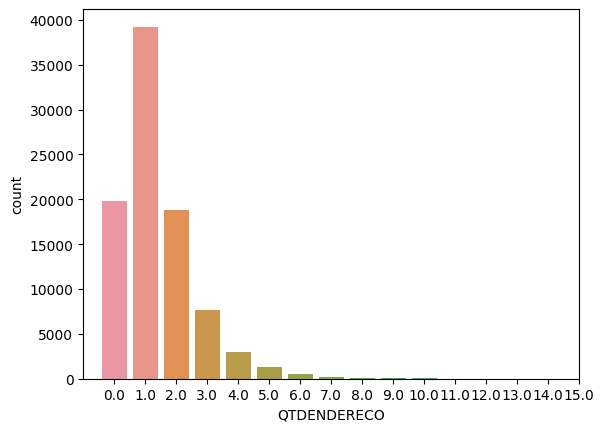

In [13]:
sns.countplot(x=df['QTDENDERECO'])
plt.xlim(-1, 15)

<AxesSubplot:>

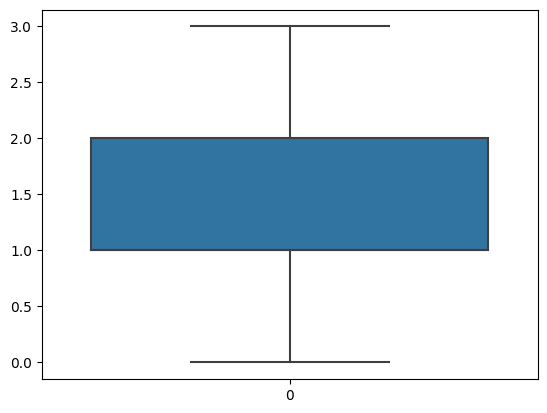

In [14]:
sns.boxplot(df['QTDENDERECO'], showfliers=False)

C:\Users\Henrique Richa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


(0.0, 10.0)

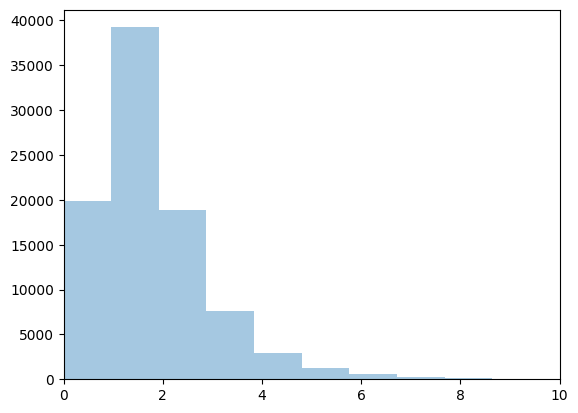

In [15]:
sns.distplot(x=df['QTDENDERECO'], kde=False)
plt.xlim(0,10)

(0.0, 15.0)

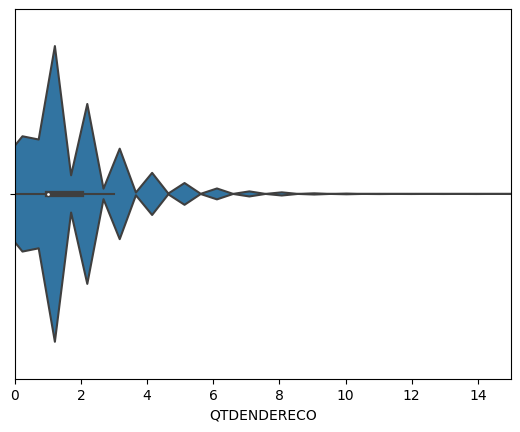

In [16]:
sns.violinplot(x=df['QTDENDERECO'])
plt.xlim(0,15)

### Quantos telefones fixos distintos o proponente possui na base  (QTDFONEFIXO)

Quantidade de endereços apresenta uma assimetria positiva e kurtosis positivo. A assimetria positiva no caso da quantidade de telefone fixo não é de se estranhar, pois conforme a quantidade aumenta, a tendência é de o número de telefones ir abaixando, porém há alguns casos incomuns entre eles, como 110 telefones fixos, tendo uma diferença para o outro indíviduo com mais telefones antes de 110 de 92 telefones, podendo significar algum tipo de erro na inserção dos dados ou apenas ser alguém incomum. E em relação ao caso mais comum são aqueles que possuem 1 telefone fixo, ficando quase empatado com as pessoas que não possuem nenhum telefone fixo, na média de 30% entre todos.

In [17]:
100 * df['QTDFONEFIXO'].sort_values(ascending=True).value_counts() / df['QTDFONEFIXO'].value_counts().sum()

1.0      30.456501
0.0      30.157228
2.0      19.792710
3.0      10.023436
4.0       5.647672
5.0       2.428290
6.0       0.922024
7.0       0.338882
8.0       0.149636
9.0       0.048412
10.0      0.018705
11.0      0.005501
14.0      0.003301
12.0      0.002201
13.0      0.002201
15.0      0.001100
18.0      0.001100
110.0     0.001100
Name: QTDFONEFIXO, dtype: float64

In [18]:
df['QTDFONEFIXO'].sort_values(ascending=True).unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  18., 110.,  nan])

In [19]:
df['QTDFONEFIXO'].sort_values(ascending=True).value_counts()

1.0      27681
0.0      27409
2.0      17989
3.0       9110
4.0       5133
5.0       2207
6.0        838
7.0        308
8.0        136
9.0         44
10.0        17
11.0         5
14.0         3
12.0         2
13.0         2
15.0         1
18.0         1
110.0        1
Name: QTDFONEFIXO, dtype: int64

(-1.0, 10.0)

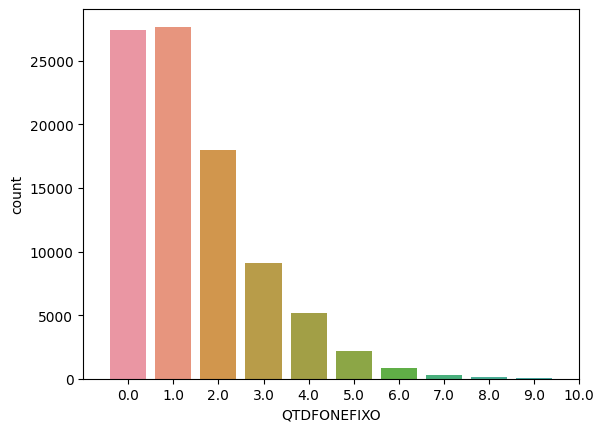

In [20]:
sns.countplot(x=df['QTDFONEFIXO'])
plt.xlim(-1,10)

<AxesSubplot:>

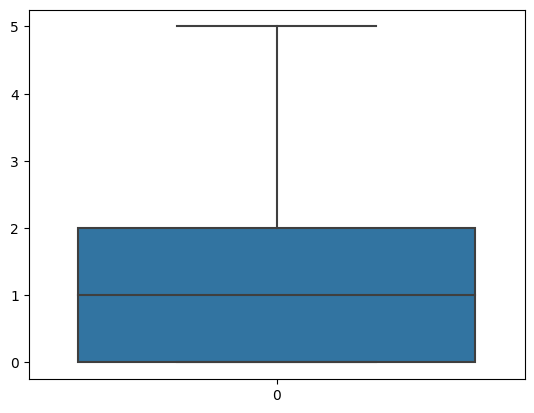

In [21]:
sns.boxplot(df['QTDFONEFIXO'], showfliers=False)

(0.0, 15.0)

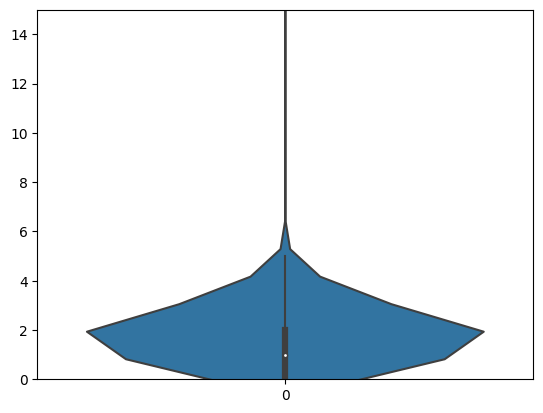

In [22]:
sns.violinplot(df['QTDFONEFIXO'])
plt.ylim(0,15)

### Flag indicativo se o CPF participa de alguma empresa (SOCIOEMPRESA)

A variável apresenta assimetria positiva, kurtosis positivo e apresenta uma váriavel do tipo flag, que pode ser ou 0, ou seja, não possue CPF participado em empresa ou 1 tendo seu CPF registrado em alguma empresa. O número de pessoas que não participam de empresa ou apenas não tem o CPF registrado em nenhuma empresa é significante em relação as pessoas que participam. Batendo de 91.5% as pessoas que não possuem CPF participativo de alguma empresa para um pouco menos de 8.5% as pessoas que tem CPF participativo de alguma empresa.

In [23]:
100 * df['SOCIOEMPRESA'].value_counts() / df['SOCIOEMPRESA'].value_counts().sum()

0.0    91.513638
1.0     8.486362
Name: SOCIOEMPRESA, dtype: float64

In [24]:
df['SOCIOEMPRESA'].unique()

array([ 0.,  1., nan])

In [25]:
df['SOCIOEMPRESA'].value_counts()

0.0    83174
1.0     7713
Name: SOCIOEMPRESA, dtype: int64

<AxesSubplot:xlabel='SOCIOEMPRESA', ylabel='count'>

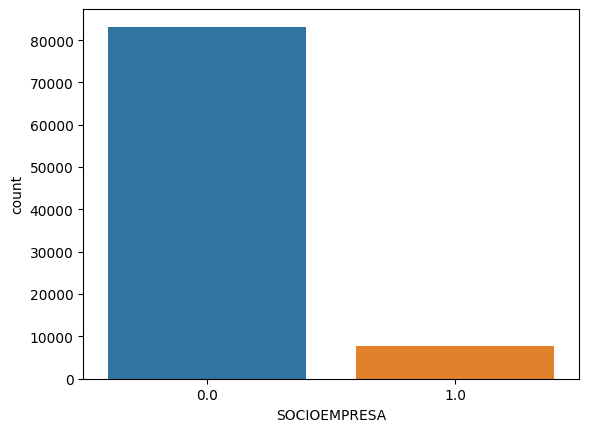

In [26]:
sns.countplot(x=df['SOCIOEMPRESA'])

# Multivariate data analysis

In this section, you should plot at least 8 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

### Flag indicativo se o CPF participa do programa bolsa familia do Governo Federal (BOLSAFAMILIA) X Determinação se a proposta é inadimplente (1) ou não (0) (TARGET) 

Ambas variáveis são de flag, então é limitada a quantidade de gráficos para mostrar o comportamento delas juntas, mas é possível perceber que se o indíviduo recebe ou não o bolsa família, há sim, uma influência para a sua proposta de receber o empréstimo. Sendo assim cerca de 87% da pessoas que não recebem o auxílio do bolsa família, também não conseguem empréstimo, já as pessoas que recebem bolsa família e não conseguem empréstimo, totalizam 3.51%, juntando estes dois, que não conseguem empréstimo, apresentam um total de 90.69%, que não é algo tão inusitado quando se fala de empréstimo, por ser algo díficil de conseguir. Entretando, entre as pessoas que conseguem empréstimo, o número dessas pessoas que recebem o auxílio do bolsa família e não recebem é muito alto, chegando em um pouco mais de 94% não recebendo o auxílio.

<AxesSubplot:xlabel='BOLSAFAMILIA', ylabel='TARGET'>

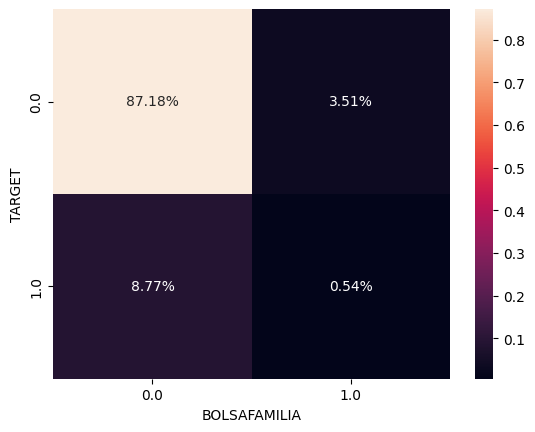

In [27]:
ctab = pd.crosstab(df['TARGET'], df['BOLSAFAMILIA'], normalize='all')
sns.heatmap(ctab, annot=True, fmt='.2%')

In [28]:
df['TARGET'].unique()

array([1., 0.])

In [29]:
df['BOLSAFAMILIA'].unique()

array([ 0.,  1., nan])

(0.0, 1.0)

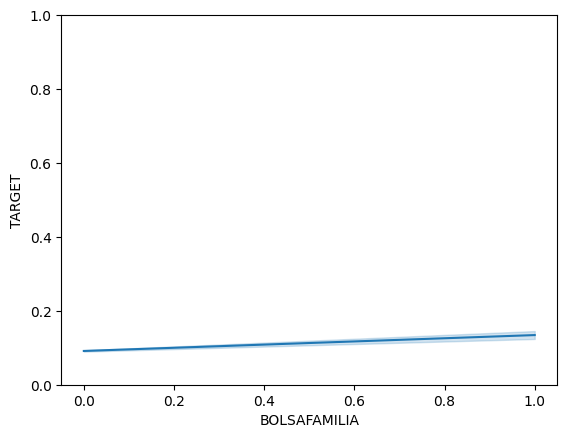

In [30]:
sns.lineplot(x=df['BOLSAFAMILIA'], y=df['TARGET'])
plt.ylim(0,1)

<AxesSubplot:xlabel='BOLSAFAMILIA', ylabel='TARGET'>

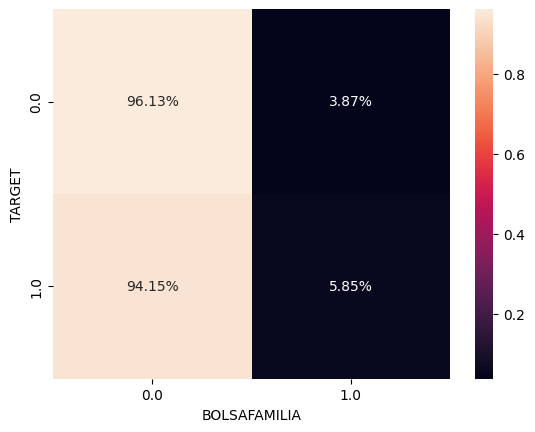

In [31]:
ctab = pd.crosstab(df['TARGET'], df['BOLSAFAMILIA'], normalize='index')
sns.heatmap(ctab, annot=True, fmt='.2%')

<AxesSubplot:xlabel='BOLSAFAMILIA', ylabel='TARGET'>

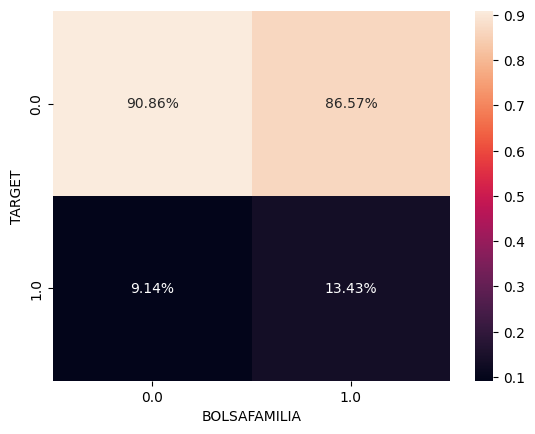

In [32]:
ctab = pd.crosstab(df['TARGET'], df['BOLSAFAMILIA'], normalize='columns')
sns.heatmap(ctab, annot=True, fmt='.2%')

# Final Plots

In this section, you need to enhance 3 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate are convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

In [33]:
# your code goes here

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

```
Add your text here.
```

# Final Steps


1. Save this report as a jupyter notebook (`.ipynb`)
2. Save a copy of this report as a PDF file (`.pdf`)
3. Copy the dataset
4. Zip it all together within a single file (`<your_team_name>.zip`)
5. Send it over using Blackboard.